# **TUBES MACHINE LEARNING**

Contributor
 * **ICHLASUL AMAL**
 * **RIZKYTA SHAINY ANGELINE** 
 
 ***
 
 **Formulasi Masalah:** Membuat pemodelan untuk memprediksi label dari data. Pada dataset ini, tujuannya adalah memprediksi apakah keesokan harinya akan bersalju atau tidak.

## Preparation

In [1]:
# Import All Package
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Show Info
print('Info All Package version!')
print('Pandas Version : {}'.format(pd.__version__))
print('Numpy Version : {}'.format(np.__version__))
print('Seaborn Version : {}'.format(sns.__version__))

Info All Package version!
Pandas Version : 0.25.1
Numpy Version : 1.16.5
Seaborn Version : 0.9.0


In [2]:
#Check Dataset
print('Datasets :')
datasetSalju = False
datasets = os.listdir('../datasets/')
for dataset in datasets:
    if dataset[-3:] == 'csv':
        if dataset[:5] == 'salju':
            datasetSalju = True
        print('\t',x)
if datasetSalju :
    print('\nDataset Salju Available')
else :
    print('Dataset Salju Not Available')

Datasets :


NameError: name 'x' is not defined

## Start to code!

In [3]:
#Read Dataset
data_train_salju = pd.read_csv('../datasets/salju_train.csv')
data_test_salju = pd.read_csv('../datasets/salju_test.csv')
print("Jumlah data train salju : {}".format(data_train_salju.shape))
print("Jumlah data test salju : {}".format(data_test_salju.shape))

Jumlah data train salju : (109095, 24)
Jumlah data test salju : (18182, 23)


### Data Exploration & Preparation

In [4]:
data_train_salju.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109095 entries, 0 to 109094
Data columns (total 24 columns):
id                          109095 non-null int64
Tanggal                     109095 non-null object
KodeLokasi                  109095 non-null object
SuhuMin                     107973 non-null float64
SuhuMax                     108166 non-null float64
Hujan                       106664 non-null float64
Penguapan                   62071 non-null float64
SinarMatahari               56716 non-null float64
ArahAnginTerkencang         101351 non-null object
KecepatanAnginTerkencang    101399 non-null float64
ArahAngin9am                101172 non-null object
ArahAngin3pm                105898 non-null object
KecepatanAngin9am           107742 non-null float64
KecepatanAngin3pm           106792 non-null float64
Kelembaban9am               107093 non-null float64
Kelembaban3pm               105721 non-null float64
Tekanan9am                  97768 non-null float64
Tekanan3pm     

In [5]:
data_train_salju.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,109095,NaN,NaN,NaN,54548,31493.2,1,27274.5,54548,81821.5,109095
Tanggal,109095,3414,15/08/2014,45,NaN,NaN,NaN,NaN,NaN,NaN,NaN
KodeLokasi,109095,49,C1,2598,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SuhuMin,107973,NaN,NaN,NaN,12.1962,6.38942,-8.5,7.6,12,16.8,33.9
SuhuMax,108166,NaN,NaN,NaN,23.2148,7.1066,-4.8,17.9,22.6,28.2,47.3
Hujan,106664,NaN,NaN,NaN,2.38501,8.58815,0,0,0,0.8,371
Penguapan,62071,NaN,NaN,NaN,5.46244,4.20164,0,2.6,4.8,7.4,145
SinarMatahari,56716,NaN,NaN,NaN,7.59953,3.78904,0,4.8,8.4,10.6,14.3
ArahAnginTerkencang,101351,16,W,7491,NaN,NaN,NaN,NaN,NaN,NaN,NaN
KecepatanAnginTerkencang,101399,NaN,NaN,NaN,40.032,13.6176,7,31,39,48,135


In [6]:
# Encode data pada BersaljuBesok dan BersaljuHariIni
data_train_salju['BersaljuBesok'] = (data_train_salju['BersaljuBesok'] == 'Ya').astype(int)
data_train_salju['BersaljuHariIni'] = (data_train_salju['BersaljuHariIni'] == 'Ya').astype(int)
data_train_salju.head()

,id,Tanggal,KodeLokasi,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,ArahAnginTerkencang,KecepatanAnginTerkencang,...,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,BersaljuHariIni,BersaljuBesok
0,1,01/06/2014,C4,10.4,15.5,4.8,NaN,NaN,WSW,24.0,...,78.0,76.0,1020.1,1018.5,NaN,NaN,13.1,15.0,1,0
1,2,15/07/2014,C10,9.0,17.0,8.0,2.6,7.4,NaN,NaN,...,80.0,61.0,1015.2,1014.6,7.0,5.0,11.9,15.5,1,1
2,3,16/02/2011,C46,18.2,32.0,0.0,NaN,NaN,ESE,44.0,...,62.0,42.0,NaN,NaN,NaN,NaN,23.8,29.6,0,0
3,4,08/08/2012,C36,7.3,24.5,0.0,8.4,10.4,SSW,54.0,...,25.0,17.0,1019.2,1016.9,1.0,7.0,15.3,23.2,0,0
4,5,29/10/2016,C7,5.9,20.3,0.0,3.6,12.6,N,37.0,...,55.0,48.0,1019.7,1014.7,2.0,6.0,12.4,18.1,0,0


In [7]:
# Cek persentase missing values pada setiap kolom
missing_percentage = (data_train_salju.isnull().sum() / data_train_salju.isnull().count()).sort_values()
missing_percentage

id                          0.000000
BersaljuHariIni             0.000000
BersaljuBesok               0.000000
KodeLokasi                  0.000000
Tanggal                     0.000000
SuhuMax                     0.008516
SuhuMin                     0.010285
Suhu9am                     0.012283
KecepatanAngin9am           0.012402
Kelembaban9am               0.018351
KecepatanAngin3pm           0.021110
Hujan                       0.022283
Suhu3pm                     0.024731
ArahAngin3pm                0.029305
Kelembaban3pm               0.030927
KecepatanAnginTerkencang    0.070544
ArahAnginTerkencang         0.070984
ArahAngin9am                0.072625
Tekanan3pm                  0.103653
Tekanan9am                  0.103827
Awan9am                     0.383556
Awan3pm                     0.407636
Penguapan                   0.431037
SinarMatahari               0.480123
dtype: float64

In [8]:
# Mengecek korelasi antara kolom BersaljuBesok dengan kolom lainnya
bersalju_corr = abs(data_train_salju.corr()['BersaljuBesok']).sort_values()
bersalju_corr

id                          0.002692
Suhu9am                     0.026721
SuhuMin                     0.081813
KecepatanAngin3pm           0.088008
KecepatanAngin9am           0.088646
Penguapan                   0.118658
SuhuMax                     0.158822
Suhu3pm                     0.192587
Tekanan3pm                  0.222901
KecepatanAnginTerkencang    0.230203
Hujan                       0.236878
Tekanan9am                  0.242786
Kelembaban9am               0.253510
BersaljuHariIni             0.307602
Awan9am                     0.316292
Awan3pm                     0.376409
Kelembaban3pm               0.441152
SinarMatahari               0.444537
BersaljuBesok               1.000000
Name: BersaljuBesok, dtype: float64

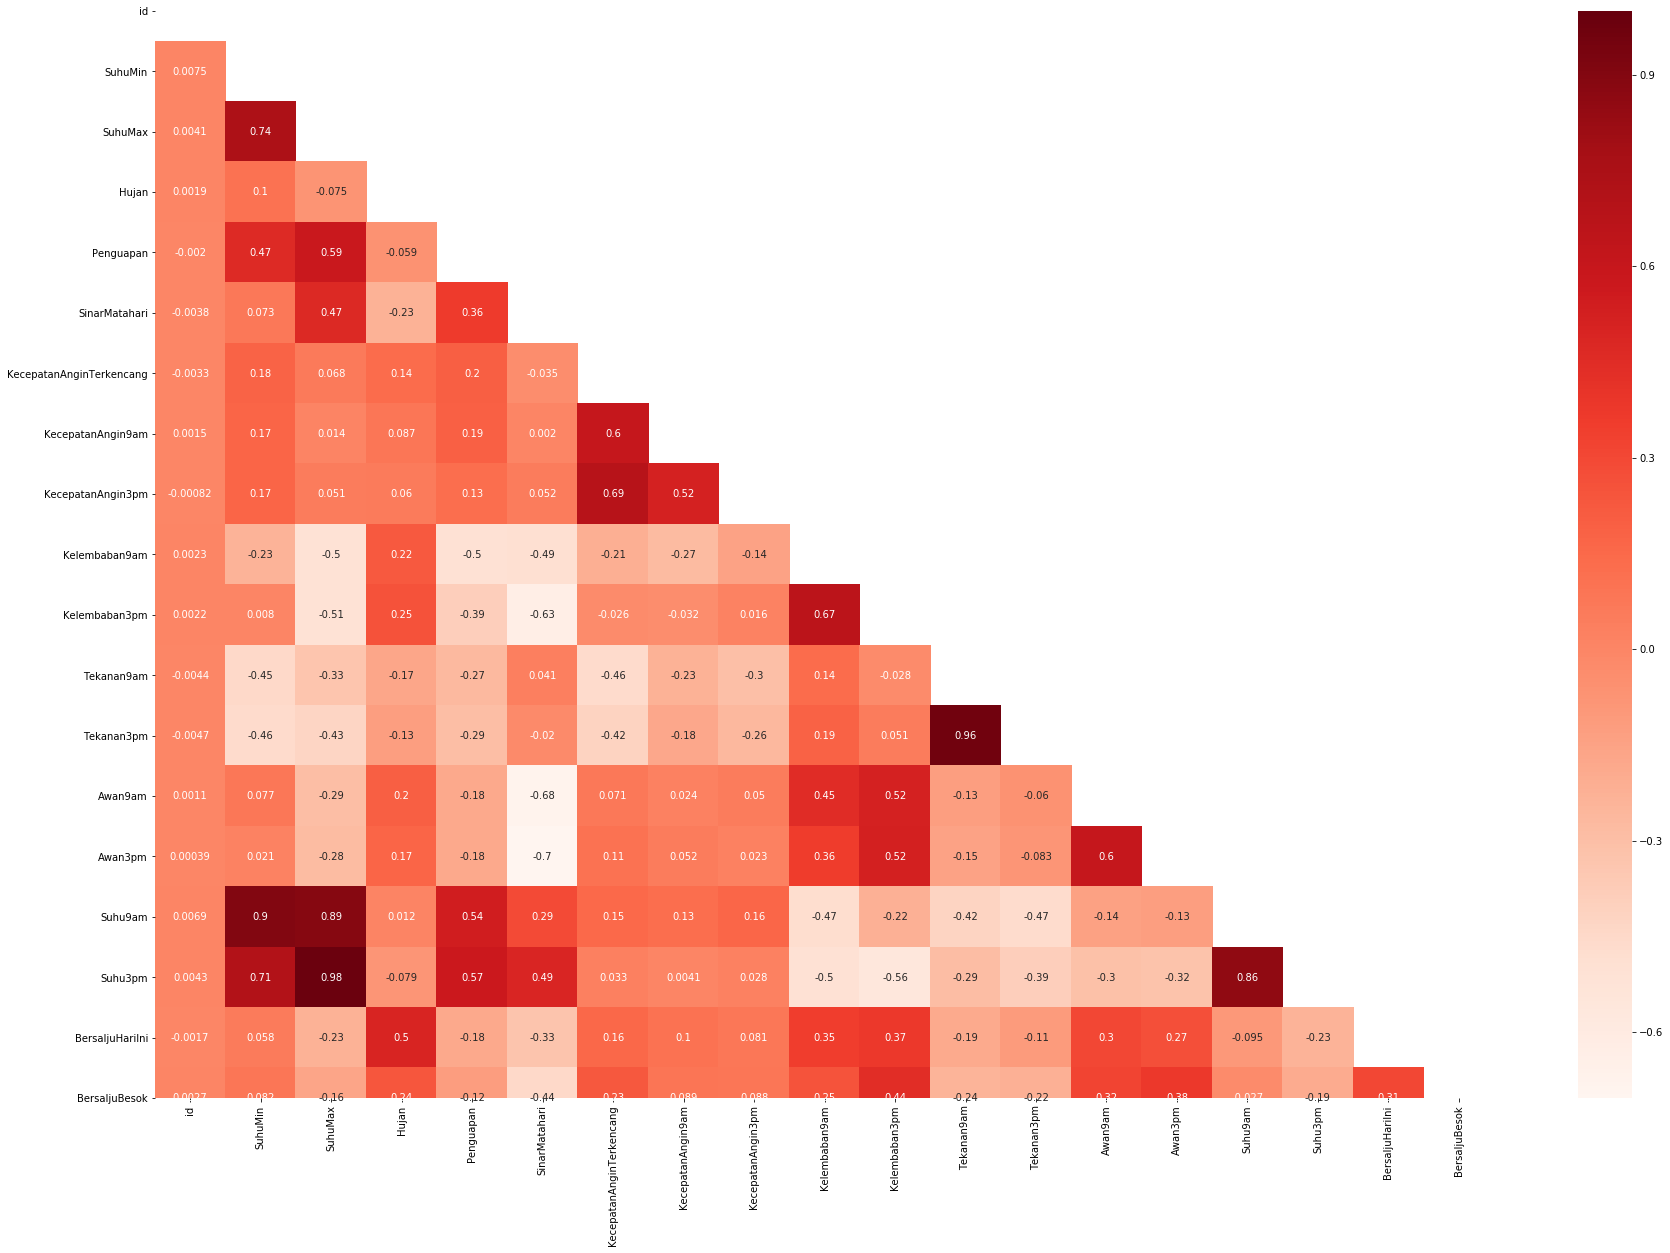

In [9]:
mask = np.triu(np.ones_like(data_train_salju.corr()))
corr = data_train_salju.corr()
fig = plt.figure(figsize=(30,20))
r = sns.heatmap(corr, annot=True, mask=mask, cmap='Reds')

In [ ]:
# Drop feature yang presentase missing values > 30%???

In [10]:
from sklearn.impute import SimpleImputer

imputer_med = SimpleImputer(strategy='median')
imputer_mean = SimpleImputer(strategy='mean')
imputer_mf = SimpleImputer(strategy='most_frequent')
'''
data_train_salju[['Kelembaban9am', 'Kelembaban3pm', 'Awan9am', 'Awan3pm']] = imputer_med.fit_transform(data_train_salju[['Kelembaban9am', 'Kelembaban3pm', 'Awan9am', 'Awan3pm']])
data_train_salju[['SuhuMin', 'SuhuMax', 'Hujan', 'Penguapan', 'SinarMatahari', 'KecepatanAnginTerkencang', 'KecepatanAngin9am', 'KecepatanAngin3pm', 'Tekanan9am', 'Tekanan3pm', 'Suhu9am', 'Suhu3pm']] = imputer_mean.fit_transform(data_train_salju[['SuhuMin', 'SuhuMax', 'Hujan', 'Penguapan', 'SinarMatahari', 'KecepatanAnginTerkencang', 'KecepatanAngin9am', 'KecepatanAngin3pm', 'Tekanan9am', 'Tekanan3pm', 'Suhu9am', 'Suhu3pm']])
data_train_salju['ArahAnginTerkencang','ArahAngin9am', 'ArahAngin3pm'] = imputer_mf.fit_transform(data_train_salju[['ArahAnginTerkencang','ArahAngin9am', 'ArahAngin3pm']])

'''
#data_train_salju.isnull().sum()

"\ndata_train_salju[['Kelembaban9am', 'Kelembaban3pm', 'Awan9am', 'Awan3pm']] = imputer_med.fit_transform(data_train_salju[['Kelembaban9am', 'Kelembaban3pm', 'Awan9am', 'Awan3pm']])\ndata_train_salju[['SuhuMin', 'SuhuMax', 'Hujan', 'Penguapan', 'SinarMatahari', 'KecepatanAnginTerkencang', 'KecepatanAngin9am', 'KecepatanAngin3pm', 'Tekanan9am', 'Tekanan3pm', 'Suhu9am', 'Suhu3pm']] = imputer_mean.fit_transform(data_train_salju[['SuhuMin', 'SuhuMax', 'Hujan', 'Penguapan', 'SinarMatahari', 'KecepatanAnginTerkencang', 'KecepatanAngin9am', 'KecepatanAngin3pm', 'Tekanan9am', 'Tekanan3pm', 'Suhu9am', 'Suhu3pm']])\ndata_train_salju['ArahAnginTerkencang','ArahAngin9am', 'ArahAngin3pm'] = imputer_mf.fit_transform(data_train_salju[['ArahAnginTerkencang','ArahAngin9am', 'ArahAngin3pm']])\n\n"

In [11]:
# Handling missing values dengan memberi nilai median dan rata-rata pada baris yang memiliki nilai null
data_train_salju['SuhuMin'].fillna(data_train_salju['SuhuMin'].mean(), inplace=True)
data_train_salju['SuhuMax'].fillna(data_train_salju['SuhuMax'].mean(), inplace=True)
data_train_salju['Hujan'].fillna(data_train_salju['Hujan'].mean(), inplace=True)
data_train_salju['Penguapan'].fillna(data_train_salju['Penguapan'].mean(), inplace=True)
data_train_salju['SinarMatahari'].fillna(data_train_salju['SinarMatahari'].mean(), inplace=True)
data_train_salju['KecepatanAnginTerkencang'].fillna(data_train_salju['KecepatanAnginTerkencang'].mean(), inplace=True)
data_train_salju['KecepatanAngin9am'].fillna(data_train_salju['KecepatanAngin9am'].mean(), inplace=True)
data_train_salju['KecepatanAngin3pm'].fillna(data_train_salju['KecepatanAngin3pm'].mean(), inplace=True)
data_train_salju['Kelembaban9am'].fillna(data_train_salju['Kelembaban9am'].median(), inplace=True)
data_train_salju['Kelembaban3pm'].fillna(data_train_salju['Kelembaban3pm'].median(), inplace=True)
data_train_salju['Tekanan9am'].fillna(data_train_salju['Tekanan9am'].mean(), inplace=True)
data_train_salju['Tekanan3pm'].fillna(data_train_salju['Tekanan3pm'].mean(), inplace=True)
data_train_salju['Awan9am'].fillna(data_train_salju['Awan9am'].median(), inplace=True)
data_train_salju['Awan3pm'].fillna(data_train_salju['Awan3pm'].median(), inplace=True)
data_train_salju['Suhu9am'].fillna(data_train_salju['Suhu9am'].mean(), inplace=True)
data_train_salju['Suhu3pm'].fillna(data_train_salju['Suhu3pm'].mean(), inplace=True)
data_train_salju.isnull().sum()

id                             0
Tanggal                        0
KodeLokasi                     0
SuhuMin                        0
SuhuMax                        0
Hujan                          0
Penguapan                      0
SinarMatahari                  0
ArahAnginTerkencang         7744
KecepatanAnginTerkencang       0
ArahAngin9am                7923
ArahAngin3pm                3197
KecepatanAngin9am              0
KecepatanAngin3pm              0
Kelembaban9am                  0
Kelembaban3pm                  0
Tekanan9am                     0
Tekanan3pm                     0
Awan9am                        0
Awan3pm                        0
Suhu9am                        0
Suhu3pm                        0
BersaljuHariIni                0
BersaljuBesok                  0
dtype: int64

In [12]:
# Menghapus kolom yang tidak akan digunakan dalam pemodelan
data_train_salju.drop(['id', 'Tanggal', 'KodeLokasi'], axis=1, inplace=True)
data_train_salju.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109095 entries, 0 to 109094
Data columns (total 21 columns):
SuhuMin                     109095 non-null float64
SuhuMax                     109095 non-null float64
Hujan                       109095 non-null float64
Penguapan                   109095 non-null float64
SinarMatahari               109095 non-null float64
ArahAnginTerkencang         101351 non-null object
KecepatanAnginTerkencang    109095 non-null float64
ArahAngin9am                101172 non-null object
ArahAngin3pm                105898 non-null object
KecepatanAngin9am           109095 non-null float64
KecepatanAngin3pm           109095 non-null float64
Kelembaban9am               109095 non-null float64
Kelembaban3pm               109095 non-null float64
Tekanan9am                  109095 non-null float64
Tekanan3pm                  109095 non-null float64
Awan9am                     109095 non-null float64
Awan3pm                     109095 non-null float64
Suhu9am 

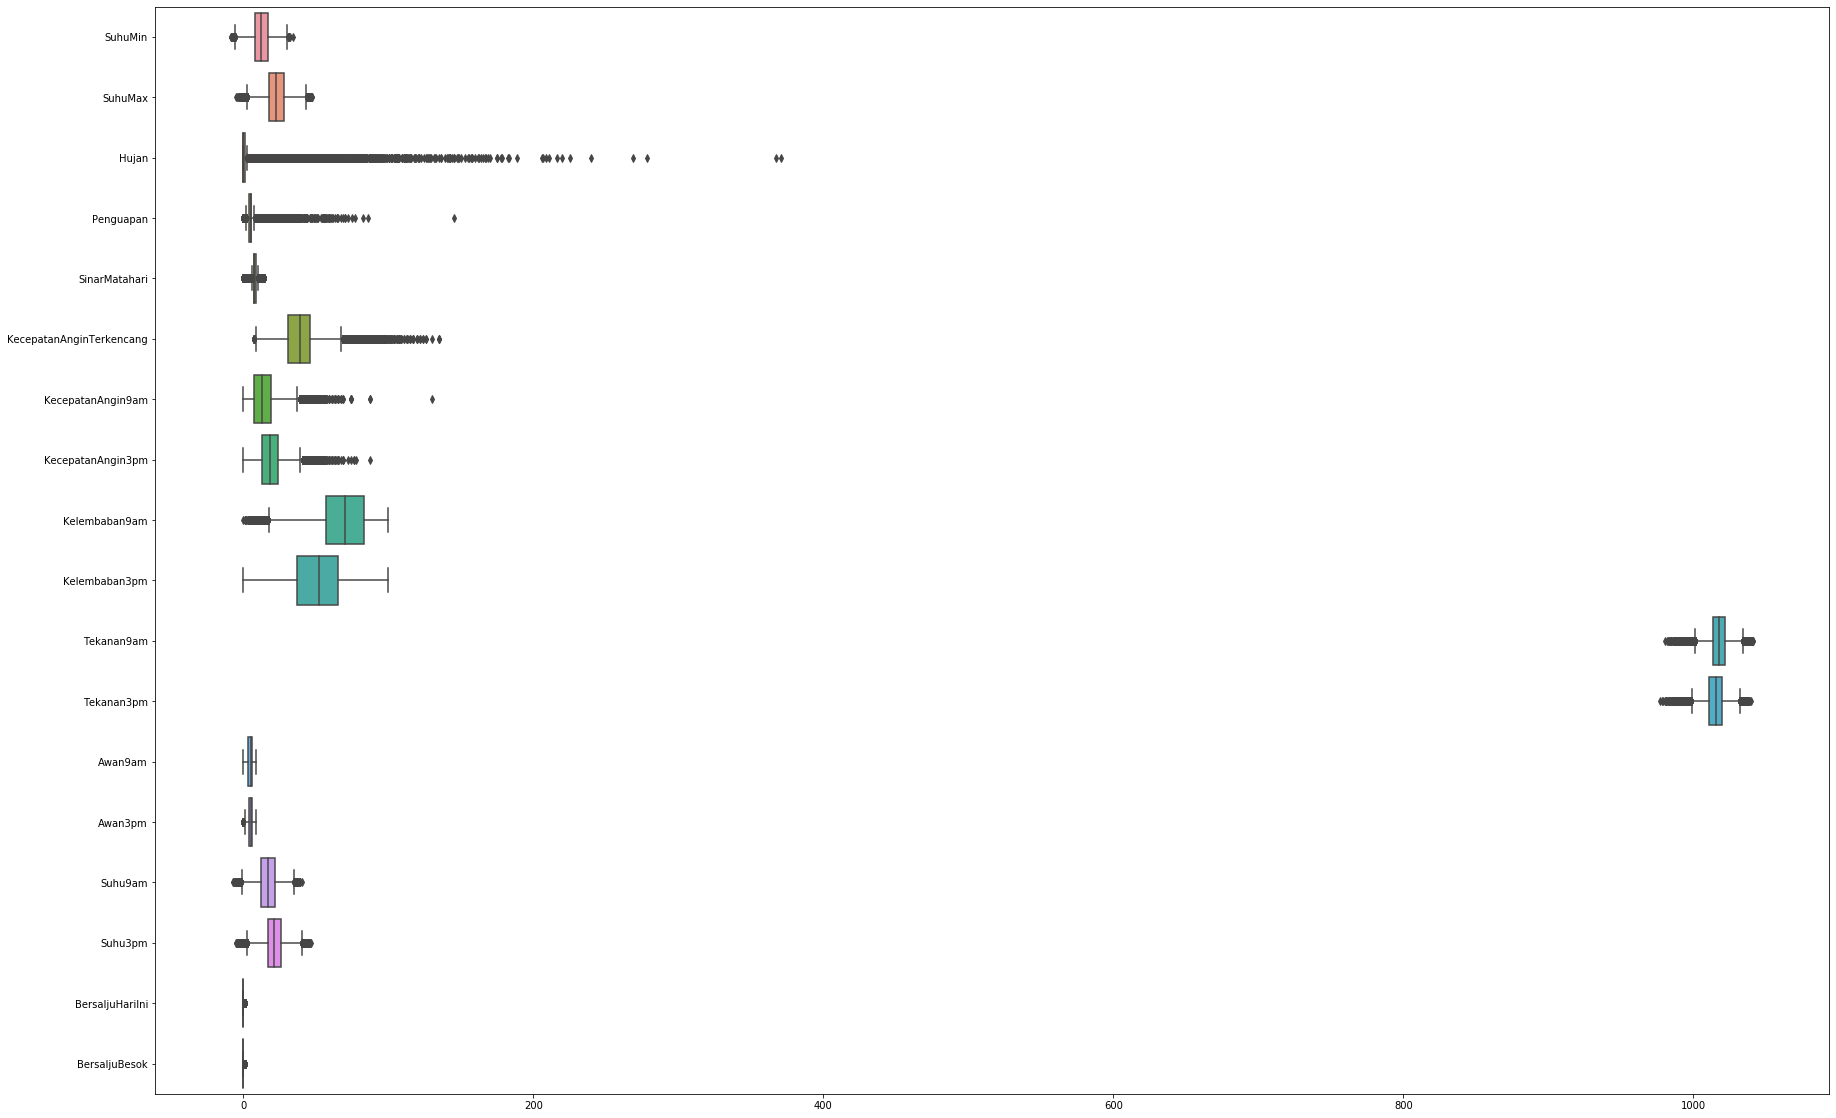

In [13]:
plt.figure(figsize=(30, 20))
sns.boxplot(data=data_train_salju, orient='h')

In [ ]:
# Handle Outlier


In [14]:
data_train_salju = pd.get_dummies(data=data_train_salju,columns=['ArahAnginTerkencang','ArahAngin9am', 'ArahAngin3pm'])
data_train_salju.head(3)

,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,KecepatanAnginTerkencang,KecepatanAngin9am,KecepatanAngin3pm,Kelembaban9am,Kelembaban3pm,...,ArahAngin3pm_NNW,ArahAngin3pm_NW,ArahAngin3pm_S,ArahAngin3pm_SE,ArahAngin3pm_SSE,ArahAngin3pm_SSW,ArahAngin3pm_SW,ArahAngin3pm_W,ArahAngin3pm_WNW,ArahAngin3pm_WSW
0,10.4,15.5,4.8,5.46244,7.599527,24.000000,0.0,13.0,78.0,76.0,...,0,0,0,0,0,0,0,0,0,1
1,9.0,17.0,8.0,2.60000,7.400000,40.032002,13.0,20.0,80.0,61.0,...,0,0,0,0,0,0,0,0,1,0
2,18.2,32.0,0.0,5.46244,7.599527,44.000000,15.0,26.0,62.0,42.0,...,0,0,0,1,0,0,0,0,0,0


In [15]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
minmax_train = scaler.fit_transform(data_train_salju)
minmax_train

array([[0.44575472, 0.38963532, 0.01293801, ..., 0.        , 0.        ,
        1.        ],
       [0.41273585, 0.4184261 , 0.02156334, ..., 0.        , 1.        ,
        0.        ],
       [0.62971698, 0.70633397, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.37735849, 0.48368522, 0.00431267, ..., 0.        , 0.        ,
        0.        ],
       [0.45518868, 0.66410749, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.49056604, 0.61804223, 0.02425876, ..., 0.        , 0.        ,
        0.        ]])

### Permodelan

In [16]:
from sklearn.model_selection import train_test_split

X = data_train_salju.drop('BersaljuBesok',axis=1)
y = data_train_salju['BersaljuBesok']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.3, random_state=42)

In [17]:
from sklearn.ensemble import RandomForestClassifier
#from sklearn.tree import DecisionTreeClassifier

In [18]:
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

### Evaluation 

In [19]:
model.score(X_train,y_train)

0.9999083361705471

In [20]:
model.score(X_valid,y_valid)

0.852668886919857

In [21]:
# prediksi pada data test
data_test_salju['BersaljuHariIni'] = (data_test_salju['BersaljuHariIni'] == 'Ya').astype(int)
data_test_salju['BersaljuBesok'] = (data_test_salju['BersaljuBesok'] == 'Ya').astype(int)

X_test = data_test_salju.drop('BersaljuBesok',axis=1)
y_test = data_test_salju['BersaljuBesok']

In [22]:
X_test = pd.get_dummies(data=X_test, columns=['ArahAnginTerkencang','ArahAngin9am', 'ArahAngin3pm'])
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18182 entries, 0 to 18181
Data columns (total 67 columns):
Tanggal                     18182 non-null object
KodeLokasi                  18182 non-null object
SuhuMin                     18017 non-null float64
SuhuMax                     18017 non-null float64
Hujan                       17795 non-null float64
Penguapan                   10326 non-null float64
SinarMatahari               9464 non-null float64
KecepatanAnginTerkencang    16908 non-null float64
KecepatanAngin9am           17984 non-null float64
KecepatanAngin3pm           17828 non-null float64
Kelembaban9am               17852 non-null float64
Kelembaban3pm               17634 non-null float64
Tekanan9am                  16317 non-null float64
Tekanan3pm                  16329 non-null float64
Awan9am                     11140 non-null float64
Awan3pm                     10726 non-null float64
Suhu9am                     17963 non-null float64
Suhu3pm                    

In [23]:
# Handling missing values dengan memberi nilai median dan rata-rata pada baris yang memiliki nilai null
X_test['SuhuMin'].fillna(X_test['SuhuMin'].mean(), inplace=True)
X_test['SuhuMax'].fillna(X_test['SuhuMax'].mean(), inplace=True)
X_test['Hujan'].fillna(X_test['Hujan'].mean(), inplace=True)
X_test['Penguapan'].fillna(X_test['Penguapan'].mean(), inplace=True)
X_test['SinarMatahari'].fillna(X_test['SinarMatahari'].mean(), inplace=True)
X_test['KecepatanAnginTerkencang'].fillna(X_test['KecepatanAnginTerkencang'].mean(), inplace=True)
X_test['KecepatanAngin9am'].fillna(X_test['KecepatanAngin9am'].mean(), inplace=True)
X_test['KecepatanAngin3pm'].fillna(X_test['KecepatanAngin3pm'].mean(), inplace=True)
X_test['Kelembaban9am'].fillna(X_test['Kelembaban9am'].median(), inplace=True)
X_test['Kelembaban3pm'].fillna(X_test['Kelembaban3pm'].median(), inplace=True)
X_test['Tekanan9am'].fillna(X_test['Tekanan9am'].mean(), inplace=True)
X_test['Tekanan3pm'].fillna(X_test['Tekanan3pm'].mean(), inplace=True)
X_test['Awan9am'].fillna(X_test['Awan9am'].median(), inplace=True)
X_test['Awan3pm'].fillna(X_test['Awan3pm'].median(), inplace=True)
X_test['Suhu9am'].fillna(X_test['Suhu9am'].mean(), inplace=True)
X_test['Suhu3pm'].fillna(X_test['Suhu3pm'].mean(), inplace=True)
X_test.isnull().sum()

Tanggal             0
KodeLokasi          0
SuhuMin             0
SuhuMax             0
Hujan               0
                   ..
ArahAngin3pm_SSW    0
ArahAngin3pm_SW     0
ArahAngin3pm_W      0
ArahAngin3pm_WNW    0
ArahAngin3pm_WSW    0
Length: 67, dtype: int64

In [24]:
# Menghapus kolom yang tidak akan digunakan dalam pemodelan
X_test.drop(['Tanggal', 'KodeLokasi'], axis=1, inplace=True)

In [25]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
minmax_test = scaler.fit_transform(X_test)

In [26]:
test_pred = model.predict(X_test)

In [27]:
model.score(X_test,y_test)

0.8738862611373887

In [28]:
output = pd.DataFrame({'': data_test_salju[], 'BersaljuBesok': test_pred})
output.to_csv(" .csv", index=False)

SyntaxError: invalid syntax (<ipython-input-28-4ccdce61a43e>, line 1)

### Experimen 

### Conclusion

